:Kishan Rajoria

# Support Vector Regression (SVR)

# Load and No-Load Losses in Transformer

Each of the Transformers have individual watt losses parameters Load losses, No Load Losses and Auxilliary Losses which is assigned rupees cost to per kilo watt. The two main documents which describe losses in transformers are: the European Standard EN 50464-1, for oil cooled transformers, and the harmonised document HD538 for , dry type transformers.

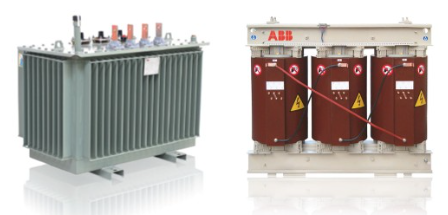

# For Feature Engineering and calculation:

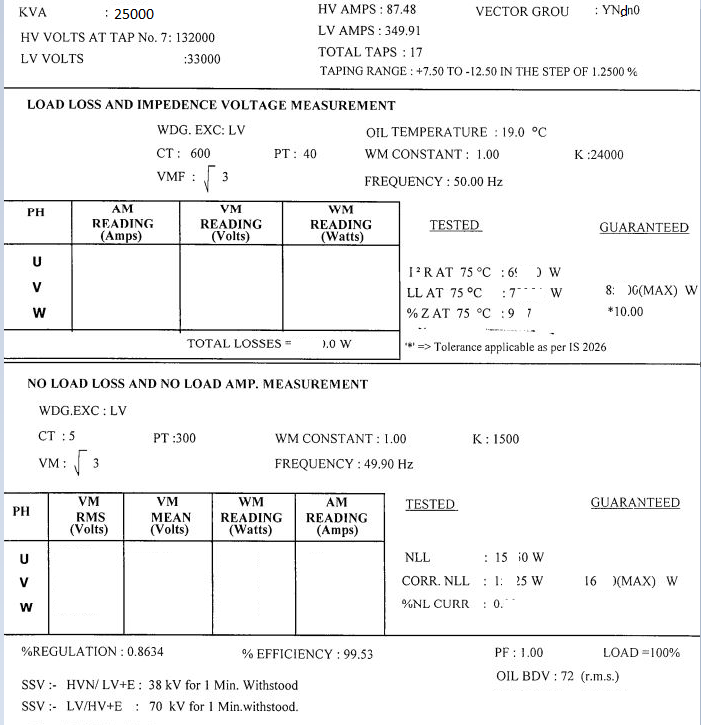

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Transfromer_Loss.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head(2)

,Transformer,KVA_Rating,@100%Load (WattLoss)
0,TR-1,250,2700
1,TR-2,315,2750


The Indian Bureau of Energy Efficiency (BEE), classifies distribution transformers in the range from 25 up to 200 kVA into 5 categories from 1 Star (high loss) to 5 Stars (low loss). 5 Stars represents worldclass performance. 3 Stars is being proposed as a minimum efficiency standard, and is being widely followed by utilities.

In [4]:
print(X)

[[ 250]
 [ 315]
 [ 400]
 [ 500]
 [ 630]
 [1000]
 [1250]
 [1600]
 [2000]
 [2500]]


In [5]:
print(y)

[ 2700  2750  3330  4100  4850  7000  8400 11300 14100 17500]


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[ 2700]
 [ 2750]
 [ 3330]
 [ 4100]
 [ 4850]
 [ 7000]
 [ 8400]
 [11300]
 [14100]
 [17500]]


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.07805547]
 [-0.9898571 ]
 [-0.87452077]
 [-0.73883096]
 [-0.56243422]
 [-0.06038196]
 [ 0.27884254]
 [ 0.75375684]
 [ 1.29651605]
 [ 1.97496505]]


In [10]:
print(y)

[[-0.99972199]
 [-0.98952699]
 [-0.87126495]
 [-0.71426191]
 [-0.56133686]
 [-0.12295174]
 [ 0.16250835]
 [ 0.75381852]
 [ 1.32473868]
 [ 2.01799888]]


## Training the SVR model on the whole dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

c:\Users\Z004K5SW\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [12]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[11]])).reshape(-1,1))

array([[3887.11590453]])

In [13]:
sc_X.inverse_transform(X)

array([[ 250.],
       [ 315.],
       [ 400.],
       [ 500.],
       [ 630.],
       [1000.],
       [1250.],
       [1600.],
       [2000.],
       [2500.]])

In [14]:
X=(regressor.predict(X)).reshape(-1,1)

## Visualising the SVR results

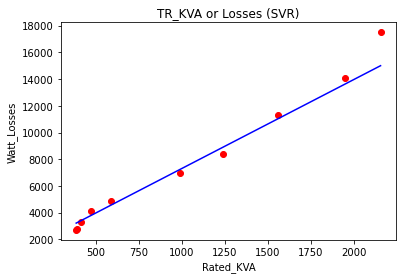

In [15]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(X), color = 'blue')
plt.title('TR_KVA or Losses (SVR)')
plt.xlabel('Rated_KVA')
plt.ylabel('Watt_Losses')
plt.show()